# Lab: Clustering Algorithms with Scikit Learn
<img src="https://github.com/0e141/ENITS_DataMining_WS23/blob/main/Week_4/IMG/sk-logo.png?raw=1" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [70]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture, metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [20]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

### First look at the data
Plot all raw data sets A-F in one figure.



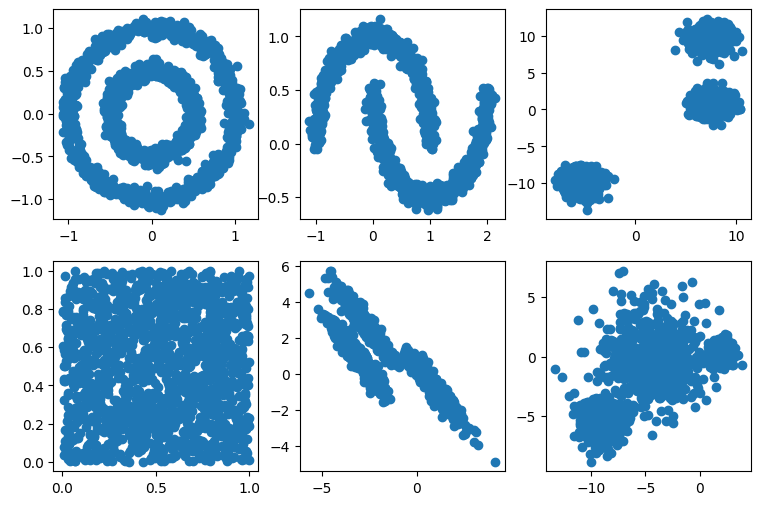

In [4]:
fig, axes = plt.subplots(2, 3,figsize=(9,6))
axes[0, 0].scatter(A[:,0], A[:,1])
axes[0, 1].scatter(B[:,0], B[:,1])
axes[0, 2].scatter(C[:,0], C[:,1])
axes[1, 0].scatter(D[:,0], D[:,1])
axes[1, 1].scatter(E[:,0], E[:,1])
axes[1, 2].scatter(F[:,0], F[:,1])

## Exercise 1
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results - HINT: set the cluster colors by ```axes[0, 0].scatter(A[:,0], A[:,1], c=label)```, where ```label``` is a vector containing the cluster ID of the data samples A (also see [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) )
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

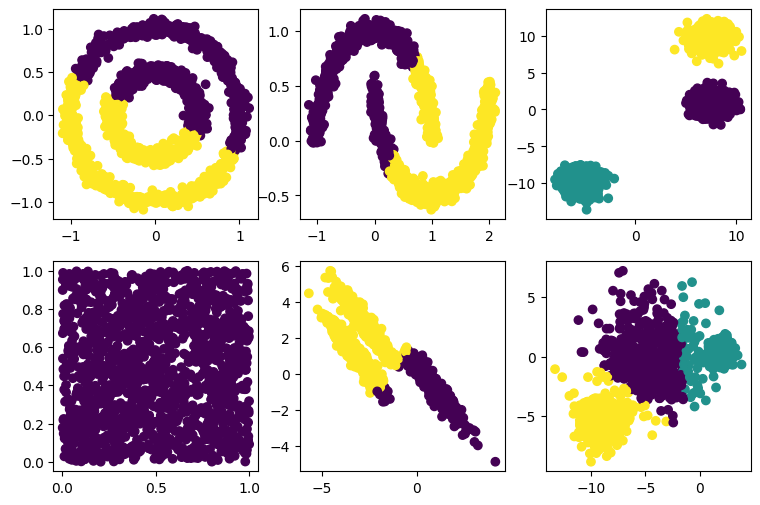

In [35]:
fig, axes = plt.subplots(2, 3,figsize=(9,6))

def func(M, c, x, y):
  model = cluster.KMeans(n_clusters=c)
  fit = model.fit(M)
  axes[x, y].scatter(M[:,0], M[:,1], c=fit.labels_)

func(A, 2, 0, 0)
func(B, 2, 0, 1)
func(C, 3, 0, 2)
func(D, 1, 1, 0)
func(E, 2, 1, 1)
func(F, 3, 1, 2)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

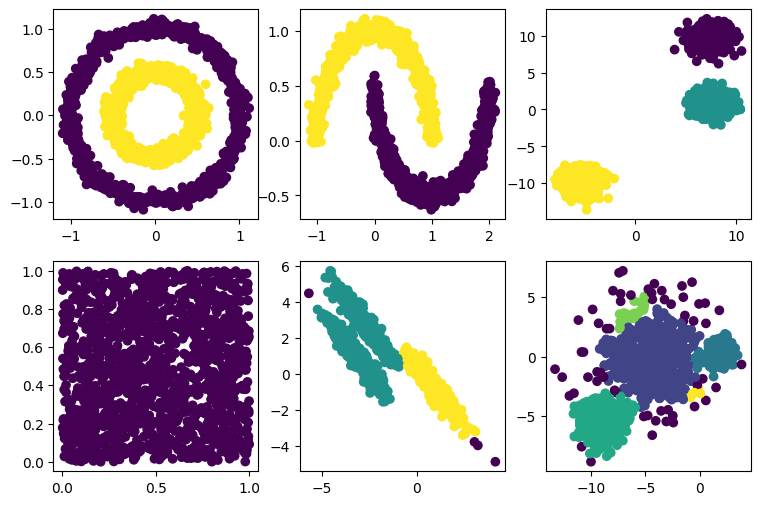

In [74]:
fig, axes = plt.subplots(2, 3,figsize=(9,6))

def func(M, eps, x, y):
  model = cluster.DBSCAN(eps=eps)
  fit = model.fit(M)
  axes[x, y].scatter(M[:,0], M[:,1], c=fit.labels_)

func(A, 0.2, 0, 0)
func(B, 0.2, 0, 1)
func(C, 1.5, 0, 2)
func(D, 1, 1, 0)
func(E, 0.4, 1, 1)
func(F, 0.65, 1, 2)

## Exercise 4
Compare the results both clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [73]:
#metrics.silhouette_score(A, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)[source]